<a href="https://colab.research.google.com/github/MonkeyWrenchGang/MGTPython/blob/main/module_4/4_3_visualizing_ml_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualising ML Models


---

Here is a simple notebook that will provide some examples of how a analyst can start to visualize the predictions of a classification model. 

We'll start by 

0. loading libraries
1. loading data 
2. exploring the target (actual outcome) 
3. exploring numeric variables relative to the target
4. exploring categorical variables relative to the target
5. finally look at predicted probabilities

About the data: 

Deliveroo is a British online food delivery company founded by Will Shu and Greg Orlowski in 2013 in London, England. It operates in the United Kingdom, France, Belgium, Ireland, Italy, Singapore, Hong Kong, the United Arab Emirates and Kuwait. They have a problem where drivers are often late - this data has been wrangled to help identify and classify if a delivery is likely late or not. It contains some helpful variables including:

1. delivery_status (1 = late, 0 = on-time)
2. predict_status (1 = late, 0 = on-time)
3. predict_proba (probablity that the delivery will be late) 

let's jump in! 

In [ ]:
# 0. load libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, precision_score

In [ ]:
# 1. load data 
roo = pd.read_csv("/content/deliveroo_on_time_deliveries.csv")
roo.head()

,distance_from_resturant,distance_to_address,weather_quality,order_price,number_of_deliveries,rush_hour,urban_address,previous_delivery_2_address,resturant_type,event_timestamp,predict_proba,predict_status,delivery_status
0,4.4,4.1,49.0,14.5,7.0,Yes,Yes,Yes,Food Truck,2020-06-29 16:21:13,0.996515,1,1
1,5.7,8.0,46.0,6.7,6.0,No,Yes,Yes,Chain,2021-02-25 06:26:32,0.007169,0,0
2,3.7,5.1,38.0,9.6,20.0,Yes,No,No,Food Truck,2020-07-28 00:23:58,0.021323,0,0
3,5.4,5.5,45.0,12.3,13.0,No,No,Yes,Chain,2020-06-12 03:25:14,0.231995,0,0
4,4.9,6.5,48.0,11.6,13.0,Yes,No,No,Chain,2021-02-23 09:37:00,0.004056,0,0


# 2. Explore Target


---

How often are deliveries late? what % of deliveries are late? 


In [ ]:
roo['delivery_status'].value_counts()

0    10457
1     4543
Name: delivery_status, dtype: int64

In [ ]:
roo['delivery_status'].value_counts(normalize=True)

0    0.697133
1    0.302867
Name: delivery_status, dtype: float64

## 2a. Make a plot.


---

Barchart is likely helpful


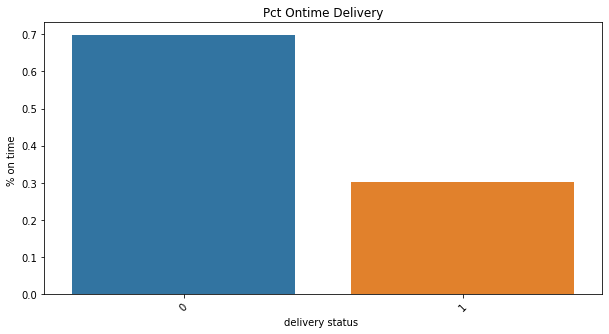

In [ ]:
res0 = (roo
        .groupby('delivery_status')[['predict_status']].agg('count')
        .rename(columns={"predict_status": "count"})
        .reset_index()
)
# -- make a % of total -- 
res0['pct_ontime'] = res0['count']/ (res0['count'].sum())
res0

plt.figure(figsize=(10,5))
# -- line plot --
sns.barplot(x = res0['delivery_status'], y=res0['pct_ontime'], )

plt.title('Pct Ontime Delivery')
plt.ylabel('% on time ')
plt.xlabel('delivery status ')

plt.xticks(rotation=45)
plt.show()

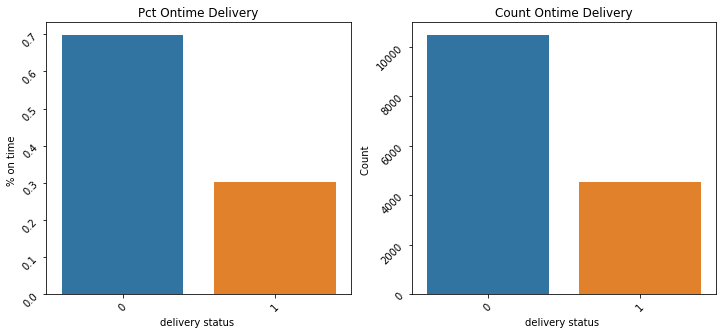

In [ ]:
# Side by side w. subplots! 
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(12,5))

sns.barplot(x = res0['delivery_status'], y=res0['pct_ontime'], ax=ax1)
sns.barplot(x = res0['delivery_status'], y=res0['count'], ax=ax2)
ax1.set_title ('Pct Ontime Delivery')
ax1.set_ylabel('% on time ')
ax1.set_xlabel('delivery status ')
ax2.set_title ('Count Ontime Delivery')
ax2.set_ylabel('Count ')
ax2.set_xlabel('delivery status ')
ax1.tick_params(labelrotation=45)
ax2.tick_params(labelrotation=45)
#plt.show()

## 2b. Subplots! 

`plt.subplots` creates a figure and a grid of subplots within a single call, while providing reasonable control over how the individual plots are created. here we can simply say how many columns (ncols=) or rows (nrows=) to create our subplots then simply reference which "ax" the plot should occupy. see below! 

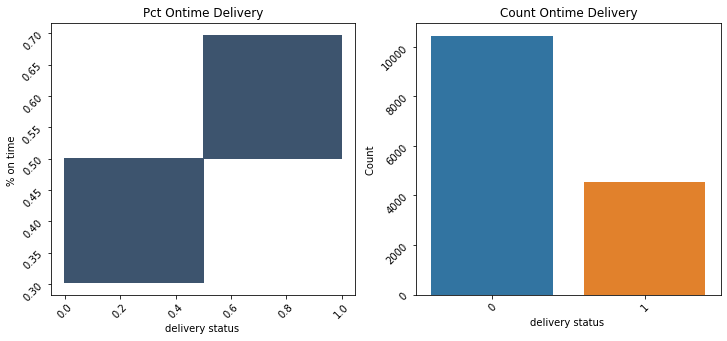

In [ ]:
# Side by side w. subplots! 
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(12,5))

sns.histplot(x = roo['delivery_status'], y=res0['pct_ontime'], ax=ax1)
sns.barplot(x = res0['delivery_status'], y=res0['count'], ax=ax2)
ax1.set_title ('Pct Ontime Delivery')
ax1.set_ylabel('% on time ')
ax1.set_xlabel('delivery status ')
ax2.set_title ('Count Ontime Delivery')
ax2.set_ylabel('Count ')
ax2.set_xlabel('delivery status ')
ax1.tick_params(labelrotation=45)
ax2.tick_params(labelrotation=45)
#plt.show()

# 3. exploring likely numeric variables relative to the target


---

Here we'll overlay two histograms usign Seaborn and the Hue option, check it out! 



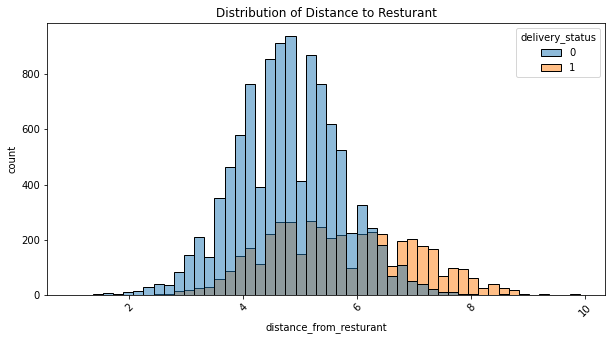

In [ ]:

plt.figure(figsize=(10,5))
# -- histogram plot --
sns.histplot(data=roo, x = roo['distance_from_resturant'], 
             bins=50, 
             stat="count",
             #multiple="stack", 
             #multiple="dodge",
             #multiple="layer",
             hue="delivery_status", alpha=0.5)
plt.title('Distribution of Distance to Resturant')
plt.ylabel('count')
plt.xlabel('distance_from_resturant')
plt.xticks(rotation=45)
plt.show()

# stretched histogram / bar charts! 



---
This is one of the most powerful, but often under-used, visuals to explain relationships to target varibles. 

with Seaborn set the option `multiple = "fill"`

flip this off and on and see what happens. 

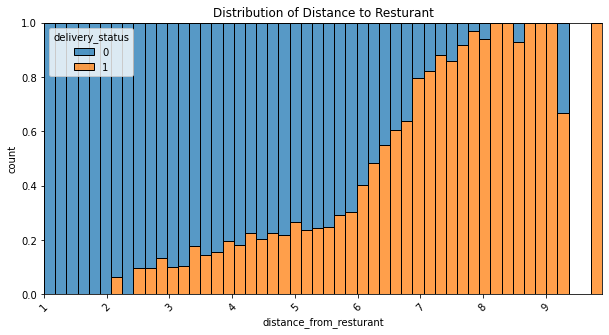

In [ ]:
plt.figure(figsize=(10,5))
# -- line plot --
sns.histplot(data=roo, 
             x = roo['distance_from_resturant'], 
             bins=50, 
             stat="probability",
             multiple="fill", # check this out! 
             hue="delivery_status")
plt.title('Distribution of Distance to Resturant')
plt.ylabel('count')
plt.xlabel('distance_from_resturant')
plt.xticks(rotation=45)
plt.show()

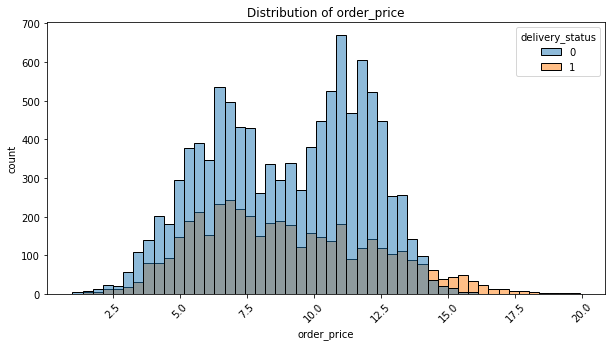

In [ ]:
plt.figure(figsize=(10,5))
# -- line plot --
sns.histplot(data=roo, 
             x = roo['order_price'], 
             bins=50, 
             stat="count",
             multiple="layer", 
             hue="delivery_status")
plt.title('Distribution of order_price')
plt.ylabel('count')
plt.xlabel('order_price')
plt.xticks(rotation=45)
plt.show()

# 4. Categorical Relation to Target 

---

Here we need to break our process up inot two steps. 
1. summarize 
2. visualize 

By taking the mean of the actual delivery status we get the percentage of ontime vs late deliveries. 


In [ ]:
res01 = (roo
         .groupby("resturant_type")[['delivery_status']]
         .agg(['count', 'mean'])
         .reset_index()
         .sort_values([('delivery_status', 'mean')], ascending=False)
         )

res01

res01.columns = res01.columns = ['_'.join(col) for col in res01.columns.values]
res01

,resturant_type_,delivery_status_count,delivery_status_mean
3,Fine Dining,122,1.000000
2,Fast Food,1215,0.916872
0,Chain,5670,0.322046
4,Food Truck,7524,0.185540
1,Fast Casual,468,0.181624


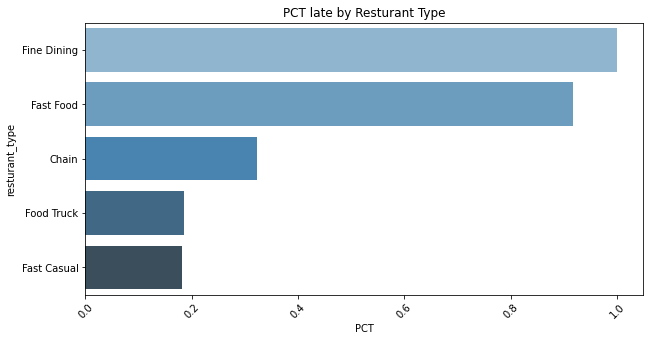

In [ ]:
# take a look at resturan type

res01 = (roo
         .groupby("resturant_type")[['delivery_status']]
         .agg(['count', 'mean'])
         .reset_index()
         .sort_values([('delivery_status', 'mean')], ascending=False)
         )
# -- flatten multi-index indexes 
res01.columns = res01.columns = ['_'.join(col) for col in res01.columns.values]
res01

plt.figure(figsize=(10,5))
# -- line plot --
sns.barplot(
             y = res01['resturant_type_'], 
             x = res01['delivery_status_mean'],
             palette="Blues_d")
plt.title('PCT late by Resturant Type')
plt.xlabel('PCT')
plt.ylabel('resturant_type')
plt.xticks(rotation=45)
plt.show()


## 4. Crosstabs 


---
We have a whole section comming up on crosstabulations but for now just realize they exist and are pretty easy to work with! 




In [ ]:
pd.crosstab(roo['resturant_type'], roo['delivery_status'])

delivery_status,0,1
resturant_type,,
Chain,3844,1826
Fast Casual,383,85
Fast Food,101,1114
Fine Dining,0,122
Food Truck,6128,1396


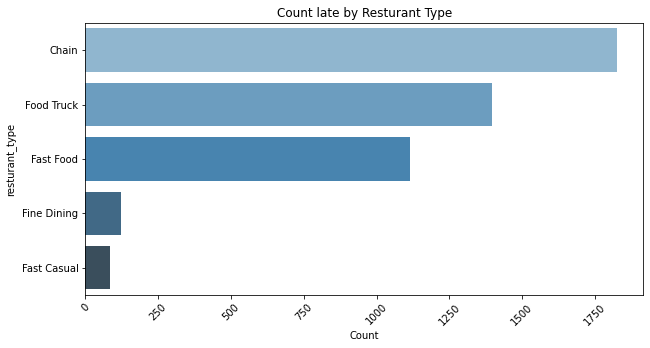

In [ ]:
res01 = (
   pd.crosstab(roo['resturant_type'], roo['delivery_status'])
  .reset_index()
  .rename(columns={0:"ontime",1:"late"})
  .sort_values('late', ascending=False)
)

plt.figure(figsize=(10,5))
# -- line plot --
sns.barplot(
             y = res01['resturant_type'], 
             x = res01['late'],
             palette="Blues_d")
plt.title('Count late by Resturant Type')
plt.xlabel('Count')
plt.ylabel('resturant_type')
plt.xticks(rotation=45)
plt.show()


In [ ]:
res01 = (
    pd.crosstab(roo['delivery_status'], roo['predict_status'])
  #.reset_index()
  #.rename(columns={0:"ontime",1:"late"})
  #.sort_values('late', ascending=False)
)
res01

predict_status,0,1
delivery_status,,
0,10378,79
1,148,4395


Text(69.0, 0.5, 'Actual')

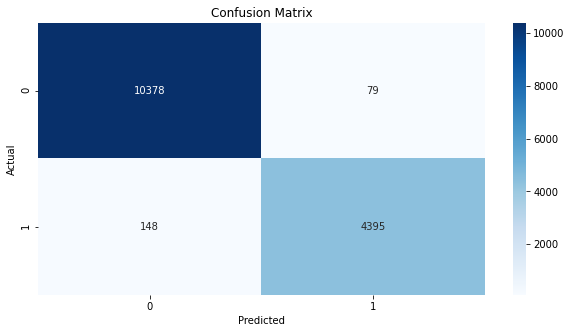

In [ ]:
res01 = (
    pd.crosstab(roo['delivery_status'], roo['predict_status'])
  #.reset_index()
  #.rename(columns={0:"ontime",1:"late"})
  #.sort_values('late', ascending=False)
)
res01

plt.figure(figsize=(10,5))
sns.heatmap(res01, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')


#5. Deal with Predicted Proabilities 


---
The predicted probabliy comes from our machine learning model - actually most classification models will generate a predicted probabilty which is used in a busienss rule to assign the "predicted outcome" this is how we make use of ML models - they give us a proabablity of some event occuring we translate that into an action for some given business problem. 

For example what is the probablity that your food delivery is late? well given the distance, weather, driver, food type etc. we can generate a likely probablity of it being late! 


---



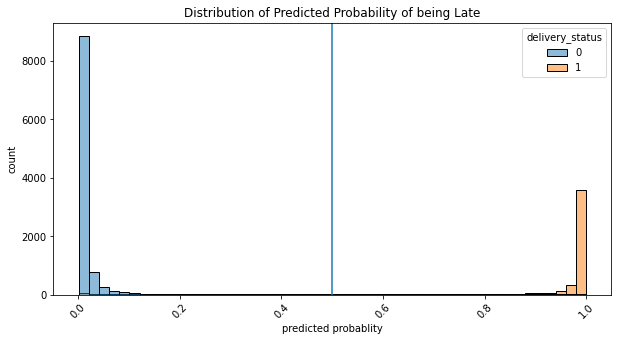

In [ ]:
plt.figure(figsize=(10,5))
# -- line plot --
sns.histplot(data=roo, x = roo['predict_proba'], 
             bins=50, 
             stat="count",
             multiple="layer", 
             hue="delivery_status", alpha=0.5)
plt.title('Distribution of Predicted Probability of being Late')
plt.ylabel('count')
plt.xlabel('predicted probablity')
plt.axvline(0.5, ymin=0, ymax=roo['predict_proba'].max())
plt.xticks(rotation=45)
plt.show()

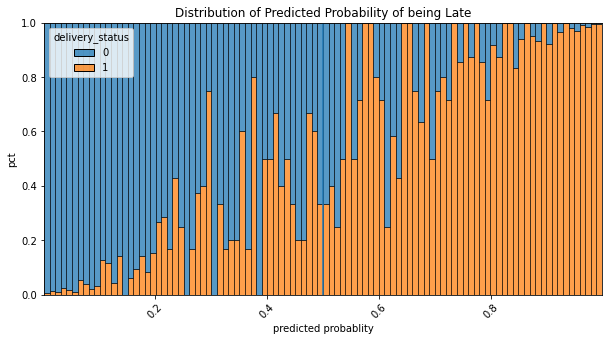

In [ ]:
plt.figure(figsize=(10,5))
# -- line plot --

sns.histplot(data=roo, 
             x = roo['predict_proba'], 
             bins=100, 
             stat="probability",
             multiple="fill", 
             hue="delivery_status")
plt.title('Distribution of Predicted Probability of being Late')
plt.ylabel('pct')
plt.axvline(0.5, ymin=0, ymax=roo['predict_proba'].max())
plt.xlabel('predicted probablity')
plt.xticks(rotation=45)
plt.show()